# new images

In [3]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

path = "/home/bule/projects/Dice/workspace/data/new_camera/empty"
images_empty = []
for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path, filename))
    if img is not None:
        images_empty.append(img)
        

images_still = []       
path = "/home/bule/projects/Dice/workspace/data/new_camera/still"
for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path, filename))
    if img is not None:
        images_still.append(img)             
        

gray_images_empty = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_empty]
gray_images_still = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_still]


scores_empty =[(np.max(im )-np.median(im))/255 for im in gray_images_empty]
scores_still =[(np.max(im)-np.median(im))/255 for im in gray_images_still]

# Scores for moving and empty images

sns.distplot(scores_empty, hist=False, rug=True, label='Empty')
sns.distplot(scores_still, hist=False, rug=True, label='Still')

plt.legend()
plt.show()


FileNotFoundError: [WinError 3] The system cannot find the path specified: '/home/bule/projects/Dice/workspace/data/new_camera/empty'

# calibration 

Calibration process started , wait for camera window to show & follow the instructions there...
Image captured
Image captured
Image captured
Image captured
Image captured
Image captured
Image captured
Image captured
Image captured
Image captured


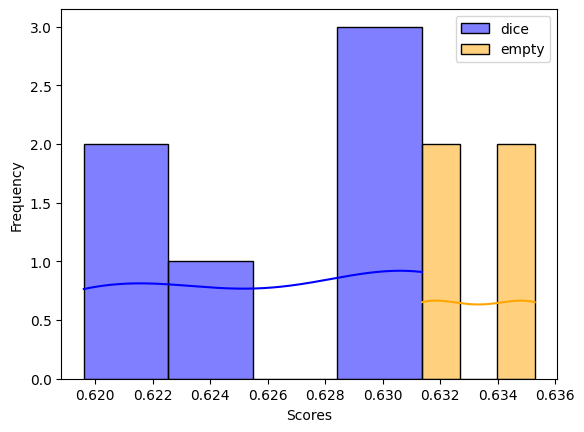

Now you should see a histogram with two distributions, pick a threshold between them to distinguish between empty scene and scene with dices.
New threshold: 0.5
Calibration saved to configuration file.


In [14]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

def calibrate_state(calibration_file="configuration/state_calibration.json"):
    print("Calibration process started , wait for camera window to show & follow the instructions there...")
    cap = cv2.VideoCapture(0)
    cap.set(cv2.CAP_PROP_EXPOSURE, 50)
    if not cap.isOpened():
        print("Cannot open camera")
        exit()
    
    imshape=(480,640)
    images=[]
    images_captured = 0
    
    capture_dict={0:"one white die",
                1:"two white dice",
                2:"one red die",
                3:"two red dice",
                4:"one red die and one white die",
                5:"two red dice and 2 white dice",
                6:"empty scene",
                7:"empty scene again",
                8:"empty scene .. again ",
                9:"empty scene .. last one!"}
    
    while images_captured < 10:
        _, frame = cap.read()
        
        frame = cv2.resize(frame, imshape[::-1])
        
        grayscaleframe= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        txt_instructions="Press SPACE to capture image with: "
        capture_type = f"{capture_dict[images_captured]}"
        cv2.putText(frame, txt_instructions, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        cv2.putText(frame, capture_type, (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        cv2.imshow('frame', frame)
        
        key = cv2.waitKey(1) & 0xFF
        if key == ord(' '):
            images.append(grayscaleframe)
            images_captured += 1
            print("Image captured")
        elif key == ord('q'):
            print("Exiting program.")
            break
        
    cap.release()
    cv2.destroyAllWindows()
    
    if images_captured == 10:
        scores =[(np.max(im )-np.median(im))/255 for im in images]
        labels = ['dice', 'empty']
        colors = ['blue', 'orange']
        sns.histplot(scores[:-4], kde=True, color=colors[0], label=labels[0], alpha=0.5)
        sns.histplot(scores[-4:], kde=True, color=colors[1], label=labels[1], alpha=0.5)
        plt.xlabel('Scores')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show(block=False)
    print("Now you should see a histogram with two distributions, pick a threshold between them to distinguish between empty scene and scene with dices.")
    new_threshold = float(input(r"Enter threshold as float in the terminal:"))
    print("New threshold:", new_threshold)
    
    confirm = str(input("Save to configuration?: Y/n"))
    if confirm == 'Y':
        with open(calibration_file) as f:
                calibration_dict = json.load(f)
        calibration_dict['state_threshold']=new_threshold
        
        with open(calibration_file, 'w') as f:
            json.dump(calibration_dict, f)
        print("Calibration saved to configuration file.")
        
    plt.close()
    print("Calibration process completed.")
    
    
calibrate_state()

# old images

In [11]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

path = "/home/bule/projects/Dice/workspace/data/eyes2/empty"
images_empty = []
for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path, filename))
    if img is not None:
        images_empty.append(img)
        
images_rolling=[]
path = "/home/bule/projects/Dice/workspace/data/eyes2/rolling"
for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path, filename))
    if img is not None:
        images_rolling.append(img)        
 
images_still = []       
path = "/home/bule/projects/Dice/workspace/data/eyes2/still"
for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path, filename))
    if img is not None:
        images_still.append(img)             
        

gray_images_empty = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_empty]
gray_images_rolling = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_rolling]
gray_images_still = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_still]


scores_empty =[(np.max(im )-np.median(im))/255 for im in gray_images_empty]
scores_rolling =[(np.max(im)-np.median(im))/255 for im in gray_images_rolling]
scores_still =[(np.max(im)-np.median(im))/255 for im in gray_images_still]

# Scores for moving and empty images

sns.distplot(scores_empty, hist=False, rug=True, label='Empty')
sns.distplot(scores_rolling, hist=False, rug=True, label='Rolling')
sns.distplot(scores_still, hist=False, rug=True, label='Still')

plt.legend()
plt.show()


FileNotFoundError: [WinError 3] The system cannot find the path specified: '/home/bule/projects/Dice/workspace/data/eyes2/empty'

In [9]:
from collections import deque
import json

class SceneStateDetector1:
    def __init__(self, calibration_file='configuration/state_calibration.json', max_frames_stack=4, imshape=(480, 640)):
        
        with open(calibration_file) as f:
            calibration_dict = json.load(f)
        
        # TODO write calibration function to calculate the threshold and moving_treshold from the empty images IO for a calibration file
        self.threshold = calibration_dict['state_threshold']
        self.moving_treshold = calibration_dict['moving_threshold']
        self.state_stack_lock = False
        self.queue =deque(maxlen=max_frames_stack)
        self.imshape=imshape
        self.last_frame = np.zeros(self.imshape)
        
    def get_scene_state(self,frame):
        
        frame = cv2.resize(frame, self.imshape[::-1])
        
        framescaled=frame/ 255.
        
        self.capture=False
        # calculate score by subtracting background from the max pixel 
        score = (np.max(framescaled) - np.median(framescaled)) 
        
        # set difference to previous frame
        difference =np.linalg.norm(framescaled-self.last_frame) #np.sqrt((framescaled - self.last_frame)**2) #L2
        
        self.last_frame = framescaled
        
        print("score",score,"difference",difference)
        state = "undecided"
        # deciding wether a frame is empty or moving
        if score < self.threshold:
            state = "empty"
        
        if difference > self.moving_treshold and score > self.threshold:
            state = "moving"
        
        if difference < self.moving_treshold and score > self.threshold:
            state = "still"
        #  push it to the stack FIFO
        self.queue.append(state)
        
        # reseting the statelock by having other states in the stack 
        if all(state != "still" for state in self.queue):
            self.state_stack_lock =False
            
        # if all the frames in the stack are still and the state is not locked we can capture the image , indicated by return capture = True
        if all(state == "still" for state in self.queue) and not self.state_stack_lock:
            self.state_stack_lock = True
            self.capture = True
            state = "empty"
            return state , self.capture
        
        
        # retrun the state and the indicator for capturing the image
        return state , self.capture

In [10]:
# create test sequence # 5 empty  5 rolling 5 still 5 rolling
testlist=gray_images_empty[:5]+gray_images_rolling[:5]+[np.copy(gray_images_still[10]) for _ in range(10)]+gray_images_rolling[5:10]


##TODO  test edge and corner cases and test with a video stream..

detector = SceneStateDetector1(calibration_file='configuration/state_calibration.json', max_frames_stack=4)

for frame in testlist:  # Replace with your actual camera stream loop
    print("-------------------------------------------------- new frame below")
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.show()
    state,im_capture = detector.get_scene_state(frame)
    print(detector.queue)
    print("Current State:", state, "Capture:", im_capture)


NameError: name 'gray_images_empty' is not defined